# ATM 

## Pre Processing

In [108]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [109]:
## maybe it will be a good idea to show the format of the open face files and show what it extracts, then explain why we process them

In [110]:
def mergeOpenFaceFilesByEmotion(path,emotion):
    os.chdir(path) 
    df = pd.DataFrame()
    df['id'] = 0
    for file in tqdm(os.listdir(os.getcwd())):
        if ".csv" in file: 
            temp = pd.read_csv(f"{file}")
            temp['id'] = file[5:12]
            df = df.append(temp, ignore_index=True)
    df = df[df.face < 2]
    df['emotion'] = 1
    df['sad'] = 1 if emotion == "sad" else 0
    df['anger'] = 1 if emotion == "anger" else 0
    df['happy'] = 1 if emotion == "happy" else 0
    df['neutral'] = 1 if emotion == "neutral" else 0
    os.chdir('..')
    df.to_csv(f"{emotion}.csv")
    return df

In [111]:
def mergeEmotions(sad, happy, neutral, anger):
    # Merge all DataFrames into a single DataFrame    
    emotions = [sad,happy,neutral,anger]

    merged_df = pd.concat(emotions)
    merged_df.to_csv("data/merged.csv")
    return merged_df


In [112]:
# Process Open Face files
# ONLY RUN THIS CELL IF YOU WANT TO PROCESS ALL THE FILES AGAIN, change the flag to true
processFiles = False
if processFiles:
    os.chdir('data/')
    # The file in anger_csv has already been preprocess, only include it you are processing the csvs from openFace
    emotions = [#("anger_csv", "anger"),
                ("sad_csv", "sad"),
                ("happy_csv", "happy"),
                ("neutral_csv", "neutral")]
    for path, emotion in emotions:
        mergeOpenFaceFilesByEmotion(path, emotion)
    os.chdir('..')

In [113]:
# Anger
anger_path = "data/anger.csv"
anger = pd.read_csv(anger_path)
anger = anger.drop(columns=anger.columns[0])
anger

,Unnamed: 0,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,anger,emotion,sad,happy,neutral
0,0,0,0.975,0.147862,0.093197,-0.984607,-0.178165,0.110866,-0.977735,-0.015,...,0.0,1.0,1.0,0.0,0.0,1,1,0,0,0
1,1,0,0.975,0.100333,0.204877,-0.973632,-0.115464,0.256094,-0.959731,-0.008,...,1.0,0.0,1.0,1.0,0.0,1,1,0,0,0
2,2,0,0.925,0.174104,0.064576,-0.982608,-0.228137,0.158009,-0.960722,-0.028,...,0.0,1.0,1.0,0.0,0.0,1,1,0,0,0
3,3,0,0.975,0.280942,0.088683,-0.955619,-0.137887,0.040724,-0.989610,0.073,...,1.0,1.0,0.0,1.0,0.0,1,1,0,0,0
4,4,0,0.975,0.141295,0.199168,-0.969726,-0.084866,0.265890,-0.960260,0.029,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,4045,0,0.975,-0.130380,0.083829,-0.987914,-0.291026,0.150451,-0.944811,-0.215,...,0.0,0.0,0.0,1.0,1.0,1,1,0,0,0
4045,4046,0,0.975,0.289196,0.048417,-0.956045,0.061203,0.010936,-0.998065,0.177,...,1.0,1.0,0.0,1.0,0.0,1,1,0,0,0
4046,4047,0,0.975,0.150270,-0.014760,-0.988535,-0.045439,0.047799,-0.997823,0.053,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0
4047,4048,0,0.875,0.074934,0.185470,-0.979789,-0.183074,0.102757,-0.977714,-0.055,...,0.0,1.0,1.0,0.0,1.0,1,1,0,0,0


In [114]:
# Sad
sad_path = "data/sad.csv"
sad = pd.read_csv(sad_path)
sad

,Unnamed: 0,id,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,emotion,sad,anger,happy,neutral
0,0,13,0.0,0.925,0.000274,0.098646,-0.995122,-0.247429,0.071535,-0.966262,...,0.0,0.0,0.0,1.0,0.0,1,1,0,0,0
1,1,26,0.0,0.925,-0.001678,-0.100134,-0.994973,-0.198556,-0.071715,-0.977462,...,0.0,1.0,1.0,0.0,0.0,1,1,0,0,0
2,2,27,0.0,0.975,0.142061,0.158582,-0.977072,-0.186912,0.191738,-0.963483,...,0.0,1.0,1.0,0.0,1.0,1,1,0,0,0
3,3,28,0.0,0.975,0.258422,0.186937,-0.947773,-0.178550,0.194627,-0.964490,...,1.0,0.0,0.0,1.0,0.0,1,1,0,0,0
4,4,32,0.0,0.975,0.040473,-0.026326,-0.998834,-0.122011,0.004342,-0.992519,...,0.0,0.0,1.0,1.0,1.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,4942,30485,1.0,0.025,0.454930,0.392425,-0.799400,0.417089,0.345322,-0.840708,...,1.0,0.0,0.0,1.0,0.0,1,1,0,0,0
4943,4943,30488,0.0,0.975,0.349583,0.035240,-0.936242,0.074581,0.089640,-0.993178,...,1.0,1.0,1.0,1.0,0.0,1,1,0,0,0
4944,4944,30489,0.0,0.975,0.117048,-0.014878,-0.993015,-0.099474,-0.039451,-0.994258,...,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0
4945,4945,30490,0.0,0.975,0.266022,-0.034268,-0.963358,-0.129766,-0.040441,-0.990720,...,0.0,0.0,0.0,1.0,0.0,1,1,0,0,0


In [115]:
# Happy
happy_path = "data/happy.csv"
happy = pd.read_csv(happy_path)
happy

,Unnamed: 0,id,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,emotion,sad,anger,happy,neutral
0,0,1,0.0,0.975,0.375181,0.139212,-0.916438,-0.105154,0.115223,-0.987758,...,0.0,0.0,0.0,0.0,1.0,1,0,0,1,0
1,1,4,0.0,0.975,0.139825,0.092373,-0.985858,-0.119940,0.126094,-0.984741,...,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0
2,2,8,0.0,0.975,0.151776,0.046124,-0.987338,-0.195018,0.028546,-0.980384,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
3,3,9,0.0,0.975,0.053250,0.284601,-0.957166,-0.080089,0.311306,-0.946929,...,1.0,1.0,1.0,0.0,1.0,1,0,0,1,0
4,4,14,0.0,0.975,0.040863,0.178146,-0.983155,-0.218169,0.146321,-0.964879,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,4940,12059,0.0,0.875,0.085099,0.289044,-0.953526,-0.288940,0.225309,-0.930457,...,0.0,1.0,1.0,0.0,0.0,1,0,0,1,0
4941,4941,12061,0.0,0.975,0.195356,0.241637,-0.950499,-0.204518,0.202795,-0.957626,...,0.0,1.0,1.0,0.0,0.0,1,0,0,1,0
4942,4942,12062,0.0,0.975,0.152482,0.090062,-0.984194,-0.211095,-0.001955,-0.977464,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
4943,4943,12063,0.0,0.975,0.261209,0.009098,-0.965239,-0.500163,-0.014264,-0.865814,...,0.0,1.0,0.0,1.0,0.0,1,0,0,1,0


In [116]:
# Neutral
neutral_path = "data/neutral.csv"
neutral = pd.read_csv(neutral_path)
neutral

,Unnamed: 0,id,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,...,AU45_c,frame,face_id,timestamp,success,emotion,sad,anger,happy,neutral
0,0,2,0.0,0.975,0.148584,0.038312,-0.988157,-0.121755,0.049366,-0.991332,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,1
1,1,3,0.0,0.875,0.236003,0.165612,-0.957536,-0.195469,0.340056,-0.919866,...,1.0,NaN,NaN,NaN,NaN,1,0,0,0,1
2,2,10,0.0,0.975,0.176030,0.096699,-0.979624,-0.257751,0.124014,-0.958220,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,1
3,3,11,0.0,0.975,0.164067,0.120528,-0.979058,-0.638724,-0.072636,-0.766000,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,1
4,4,16,0.0,0.975,0.305166,0.094639,-0.947585,0.008903,0.044558,-0.998967,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,4927,17435,0.0,0.975,0.098718,0.119212,-0.987949,-0.201737,0.056425,-0.977813,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,1
4927,4928,17436,0.0,0.975,0.061293,0.033972,-0.997542,-0.144866,0.000809,-0.989451,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,1
4928,4929,17437,0.0,0.975,0.030414,0.292074,-0.955912,-0.239080,0.235707,-0.941957,...,1.0,NaN,NaN,NaN,NaN,1,0,0,0,1
4929,4930,17438,0.0,0.975,0.196345,-0.021424,-0.980301,-0.140840,-0.038029,-0.989302,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,1


In [117]:
merged_df = mergeEmotions(sad, happy, neutral, anger)
merged_df

,Unnamed: 0,id,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,...,AU45_c,emotion,sad,anger,happy,neutral,frame,face_id,timestamp,success
0,0,13.0,0.0,0.925,0.000274,0.098646,-0.995122,-0.247429,0.071535,-0.966262,...,0.0,1,1,0,0,0,NaN,NaN,NaN,NaN
1,1,26.0,0.0,0.925,-0.001678,-0.100134,-0.994973,-0.198556,-0.071715,-0.977462,...,0.0,1,1,0,0,0,NaN,NaN,NaN,NaN
2,2,27.0,0.0,0.975,0.142061,0.158582,-0.977072,-0.186912,0.191738,-0.963483,...,1.0,1,1,0,0,0,NaN,NaN,NaN,NaN
3,3,28.0,0.0,0.975,0.258422,0.186937,-0.947773,-0.178550,0.194627,-0.964490,...,0.0,1,1,0,0,0,NaN,NaN,NaN,NaN
4,4,32.0,0.0,0.975,0.040473,-0.026326,-0.998834,-0.122011,0.004342,-0.992519,...,1.0,1,1,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,4045,NaN,0.0,0.975,-0.130380,0.083829,-0.987914,-0.291026,0.150451,-0.944811,...,1.0,1,0,1,0,0,NaN,NaN,NaN,NaN
4045,4046,NaN,0.0,0.975,0.289196,0.048417,-0.956045,0.061203,0.010936,-0.998065,...,0.0,1,0,1,0,0,NaN,NaN,NaN,NaN
4046,4047,NaN,0.0,0.975,0.150270,-0.014760,-0.988535,-0.045439,0.047799,-0.997823,...,0.0,1,0,1,0,0,NaN,NaN,NaN,NaN
4047,4048,NaN,0.0,0.875,0.074934,0.185470,-0.979789,-0.183074,0.102757,-0.977714,...,1.0,1,0,1,0,0,NaN,NaN,NaN,NaN


In [118]:
# cleaning df
merged_df = merged_df.dropna(axis=1,how='all')
merged_df

,Unnamed: 0,id,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,emotion,sad,anger,happy,neutral
0,0,13.0,0.0,0.925,0.000274,0.098646,-0.995122,-0.247429,0.071535,-0.966262,...,0.0,0.0,0.0,1.0,0.0,1,1,0,0,0
1,1,26.0,0.0,0.925,-0.001678,-0.100134,-0.994973,-0.198556,-0.071715,-0.977462,...,0.0,1.0,1.0,0.0,0.0,1,1,0,0,0
2,2,27.0,0.0,0.975,0.142061,0.158582,-0.977072,-0.186912,0.191738,-0.963483,...,0.0,1.0,1.0,0.0,1.0,1,1,0,0,0
3,3,28.0,0.0,0.975,0.258422,0.186937,-0.947773,-0.178550,0.194627,-0.964490,...,1.0,0.0,0.0,1.0,0.0,1,1,0,0,0
4,4,32.0,0.0,0.975,0.040473,-0.026326,-0.998834,-0.122011,0.004342,-0.992519,...,0.0,0.0,1.0,1.0,1.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,4045,NaN,0.0,0.975,-0.130380,0.083829,-0.987914,-0.291026,0.150451,-0.944811,...,0.0,0.0,0.0,1.0,1.0,1,0,1,0,0
4045,4046,NaN,0.0,0.975,0.289196,0.048417,-0.956045,0.061203,0.010936,-0.998065,...,1.0,1.0,0.0,1.0,0.0,1,0,1,0,0
4046,4047,NaN,0.0,0.975,0.150270,-0.014760,-0.988535,-0.045439,0.047799,-0.997823,...,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0
4047,4048,NaN,0.0,0.875,0.074934,0.185470,-0.979789,-0.183074,0.102757,-0.977714,...,0.0,1.0,1.0,0.0,1.0,1,0,1,0,0


In [119]:
merged_df.describe()

,Unnamed: 0,id,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,emotion,sad,anger,happy,neutral
count,18872.000000,14823.000000,18872.000000,18872.000000,18872.000000,18872.000000,18872.000000,18872.000000,18872.000000,18872.000000,...,18872.000000,18872.000000,18872.000000,18872.000000,18872.000000,18872.0,18872.000000,18872.000000,18872.000000,18872.000000
mean,2374.656687,11796.536666,0.006041,0.933543,0.154523,0.116276,-0.957500,-0.152952,0.131292,-0.955775,...,0.221015,0.385757,0.337802,0.334464,0.227321,1.0,0.262134,0.214551,0.262028,0.261287
std,1387.472735,8259.229010,0.077489,0.139905,0.162484,0.122963,0.065406,0.164042,0.121838,0.064110,...,0.414942,0.486786,0.472973,0.471815,0.419113,0.0,0.439807,0.410521,0.439750,0.439347
min,0.000000,1.000000,0.000000,0.000000,-0.522581,-0.847118,-0.999993,-0.999298,-0.451172,-0.999994,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,1179.000000,5146.500000,0.000000,0.975000,0.063457,0.036820,-0.988925,-0.237468,0.052941,-0.987613,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,2359.000000,10228.000000,0.000000,0.975000,0.141674,0.117258,-0.975343,-0.145410,0.131651,-0.973041,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
75%,3538.250000,16635.500000,0.000000,0.975000,0.235419,0.194426,-0.949745,-0.063934,0.208441,-0.947743,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,1.000000,1.000000
max,4946.000000,30491.000000,1.000000,0.975000,0.998389,0.647838,0.077273,0.470742,0.789045,0.053842,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [120]:
merged_df = merged_df.drop(['id'], axis=1)

In [121]:
merged_df.isna().sum()

Unnamed: 0     0
face           0
 confidence    0
 gaze_0_x      0
 gaze_0_y      0
              ..
emotion        0
sad            0
anger          0
happy          0
neutral        0
Length: 717, dtype: int64

In [122]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18872 entries, 0 to 4048
Columns: 717 entries, Unnamed: 0 to neutral
dtypes: float64(711), int64(6)
memory usage: 103.4 MB


## Data Exploration

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
def graphEmotionDistribution(df):
    emotion_cols = ['happy', 'sad', 'anger', 'neutral']
    emotion_df = df[emotion_cols]
    counts = emotion_df.sum()

    # Plot a stacked bar plot of the emotion frequencies
    fig, ax = plt.subplots(figsize=(8, 6))
    counts.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xticklabels(counts.index, rotation=0)
    ax.set_title('Emotions Frequency')
    ax.set_xlabel('Emotion')
    ax.set_ylabel('Frequency')
    plt.show()


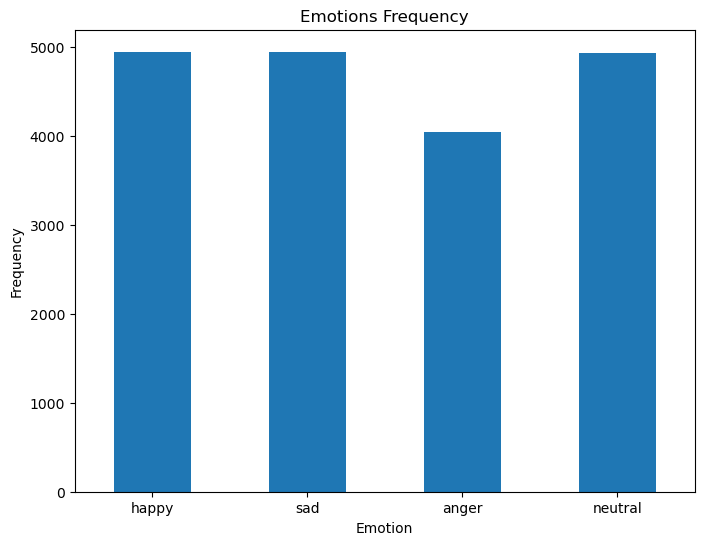

In [125]:
graphEmotionDistribution(merged_df)

## Models

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [127]:
training_data, testing_data = train_test_split(merged_df, test_size=0.2, random_state=25)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 15097
No. of testing examples: 3775


In [128]:
y_test = testing_data[['anger', 'happy', 'sad', 'neutral']]
nb_y_test = testing_data[['anger', 'happy', 'sad', 'neutral']].values
X_test = testing_data.drop(['anger', 'happy', 'sad', 'neutral'], axis=1)

In [129]:
y_train = training_data[['anger', 'happy', 'sad', 'neutral']]
nb_y_train = training_data[['anger', 'happy', 'sad', 'neutral']].values
X_train = training_data.drop(['anger', 'happy', 'sad', 'neutral'], axis=1)

In [130]:
rf_model = RandomForestClassifier()
nb_model = GaussianNB()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_knn = KNeighborsClassifier()

In [131]:
# Fitting the models
model_knn.fit(X_train, y_train)
nb_model.fit(X_train, nb_y_train)


ValueError: y should be a 1d array, got an array of shape (15097, 4) instead.

In [ ]:
# Predicitons
y_pred_knn = model_knn.predict(X_test)
y_pred_nb = nb_model.predict(X_test)



In [ ]:
model_knn_score = model_knn.score(X_test, y_test)
y_model_knn_predicted = model_knn.predict(X_test)
y_model_knn_pred_proba = model_knn.predict_proba(X_test)

print("K Neighbors",model_knn_score)

nb_model_score = nb_model.score(X_test, y_test)
y_model_nb_predicted = nb_model.predict(X_test)
y_model_nb_pred_proba = nb_model.predict_proba(X_test)

print("Naive Bayes", nb_model_score)

K Neighbors 0.1557615894039735


In [ ]:
# K Neighbors model tuning and data scaling 

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def KnighborsProcessing(model, X_train, X_test, y_train, y_test):
    X_train_scaled, X_test_scaled= scale(X_train, X_test)
    model = tuneAndfindModel(model, X_train_scaled, X_test_scaled, y_train, y_test)
    return model,X_train_scaled,X_test_scaled

def scale(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # create a random forest classifier to select features
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    selector = SelectFromModel(rf, prefit=False, threshold='mean')

    # fit the selector to the training data
    selector.fit(X_train_scaled, y_train)

    # apply the selector to both the training and testing data
    X_train_selected = selector.transform(X_train_scaled)
    X_test_selected = selector.transform(X_test_scaled)

    return X_train_selected, X_test_selected

def tuneAndfindModel(model, X_train, X_test, y_train, y_test):
    # create a parameter grid for the k value and distance metric
    param_grid = {'n_neighbors': range(1, 30), 'metric': ['euclidean', 'manhattan', 'minkowski']}

    # create a GridSearchCV object with the k-nearest neighbors model and the parameter grid
    grid = GridSearchCV(model, param_grid, cv=5)

    grid.fit(X_train, y_train)

    # get the best k and distance metric from the GridSearchCV object
    best_k = grid.best_params_['n_neighbors']
    best_metric = grid.best_params_['metric']

    model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Best k:", best_k)
    print("Best metric:", best_metric)
    print("Accuracy:", accuracy)
    return model


In [ ]:
import joblib
if os.path.exists("models/knn_model.joblib"):
    model_knn = joblib.load('models/knn_model.joblib')
    # aprox 2 min to run the scaling
    X_train_scaled_knn, X_test_scaled_knn = scale(X_train, X_test)
else:
    # it takes aprox 18min to run this
    model_knn, X_train_scaled_knn, X_test_scaled_knn  = KnighborsProcessing(model_knn, X_train, X_test, y_train, y_test)
    joblib.dump(model_knn, 'models/knn_model.joblib')


In [ ]:
y_pred_knn = model_knn.predict(X_test_scaled_knn)
model_knn_score = model_knn.score(X_test_scaled_knn, y_test)
y_model_knn_predicted = model_knn.predict(X_test_scaled_knn)
y_model_knn_pred_proba = model_knn.predict_proba(X_test_scaled_knn)

print("K Neighbors",model_knn_score)

K Neighbors 0.5218543046357615


## Results

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def visualEvaluation(y, models, predictions, pred_probabilities):
    for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
        cm = confusion_matrix(y, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1", "2", "3"])
        disp.plot(
            include_values=True,
            cmap='gray',
            colorbar=False
        )
        disp.ax_.set_title(f"{model} Confusion Matrix")
        
    plt.show()

In [ ]:
print("K Neighbors \n",classification_report(y_test, y_pred_knn,zero_division=1))


K Neighbors 
               precision    recall  f1-score   support

           0       0.45      0.48      0.46       803
           1       0.72      0.74      0.73       983
           2       0.47      0.43      0.45      1004
           3       0.43      0.44      0.43       985

   micro avg       0.52      0.52      0.52      3775
   macro avg       0.52      0.52      0.52      3775
weighted avg       0.52      0.52      0.52      3775
 samples avg       0.52      0.52      0.52      3775



In [ ]:
y_test_array = np.array(y_test.values.tolist())
y_test_labels = np.argmax(y_test_array, axis=1)

In [ ]:
y_pred_knn_labels = np.argmax(y_pred_knn, axis=1)

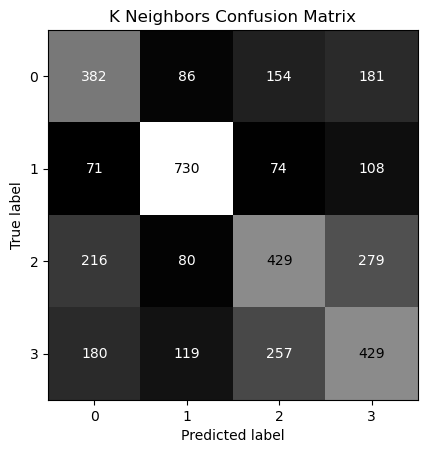

In [ ]:
models = ['K Neighbors']
predictions = [y_pred_knn_labels]
pred_probabilities = [ y_model_knn_pred_proba]

visualEvaluation(y_test_labels,models, predictions, pred_probabilities)